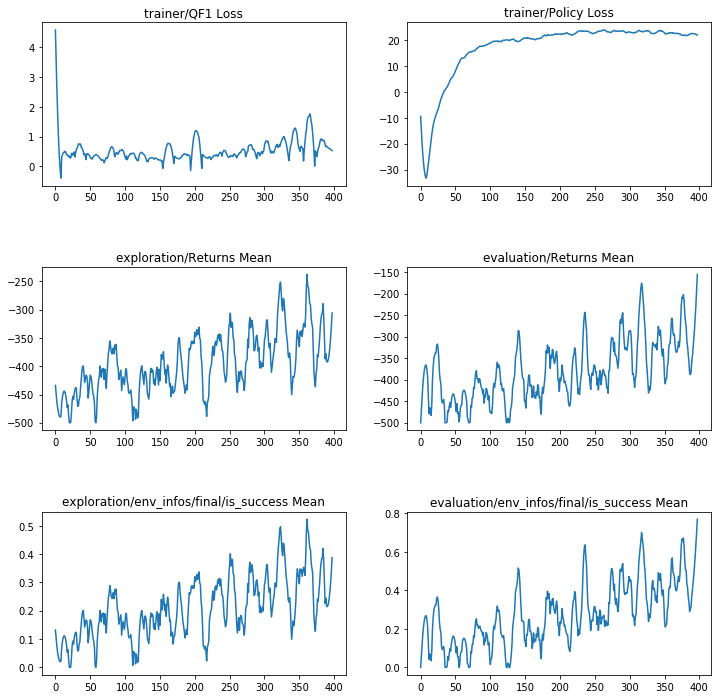

In [265]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
%matplotlib inline

dir_ = '/home/misha/research/rlkit/data'
file = '/pontmass-HER-SAC-test/pontmass_HER-SAC_test_2019_07_12_15_56_01_0000--s-0/progress.csv'

file = '/reacher-HER-SAC-0/reacher_HER-SAC_0_2019_07_12_17_55_33_0000--s-0/progress.csv'

file = '/reacher-SAC-0/reacher_SAC_0_2019_07_12_19_57_03_0000--s-0/progress.csv'

#file = '/reacher-SAC-0/reacher_SAC_0_2019_07_12_20_26_49_0000--s-0/progress.csv'

#file = '/manipulator-SAC-0/manipulator_SAC_0_2019_07_12_21_49_58_0000--s-0/progress.csv'

file = '/pointmass-SAC-0/pointmass_SAC_0_2019_07_14_11_35_56_0000--s-0/progress.csv'

file = '/reacher-HER-SAC-0/reacher_HER-SAC_0_2019_07_14_13_46_19_0000--s-0/progress.csv'

file = '/vqvae-pointmass-SAC-exp-r/vqvae_pointmass_SAC_exp_r_2019_07_14_18_14_39_0000--s-0/progress.csv'

file = '/vqvae-pointmass-SAC-log-r/vqvae_pointmass_SAC_log_r_2019_07_14_18_29_05_0000--s-0/progress.csv'

file = '/vqvae-pointmass-SAC-jul15-log-r/vqvae_pointmass_SAC_jul15_log_r_2019_07_15_11_55_18_0000--s-0/progress.csv'

file = '/vqvae-pointmass-SAC-jul15-binary/vqvae_pointmass_SAC_jul15_binary_2019_07_15_12_17_14_0000--s-0/progress.csv'

file = '/vqvae-pointmass-SAC-jul15-cheat/vqvae_pointmass_SAC_jul15_cheat_2019_07_15_12_23_17_0000--s-0/progress.csv'

file1 ='/vqvae-pointmass-SAC-cheat-index/vqvae_pointmass_SAC_cheat_index_2019_07_15_13_57_24_0000--s-0/progress.csv'

file2 = '/vqvae-pointmass-SAC-cheat-cont/vqvae_pointmass_SAC_cheat_cont_2019_07_15_14_33_01_0000--s-0/progress.csv'

file3 = '/vqvae-pointmass-SAC-cheat-mixed/vqvae_pointmass_SAC_cheat_mixed_2019_07_15_18_37_32_0000--s-0/progress.csv'


file =  '/pointmass-HER-SAC-0/pointmass_HER-SAC_0_2019_07_16_13_12_53_0000--s-0/progress.csv'
file = '/pm-HER-SAC-VQVAE-jul16/pm_HER-SAC-VQVAE_jul16_2019_07_16_15_19_23_0000--s-0/progress.csv'
file = '/pm-HER-SAC-VQVAE-jul16/pm_HER-SAC-VQVAE_jul16_2019_07_16_20_15_11_0000--s-0/progress.csv'
#file = '/reacher-SAC-HER-sparse/reacher_SAC-HER_sparse_2019_07_17_17_09_00_0000--s-0/progress.csv'
#file ='/reacher-SAC-dense/reacher_SAC_dense_2019_07_17_14_04_20_0000--s-0/progress.csv'
#file = '/reacher-SAC-HER-VQVAE-0/reacher_SAC-HER-VQVAE_0_2019_07_17_19_13_00_0000--s-0/progress.csv'

""" golden reacher boy here """
file = '/reacher-no-target-SAC-HER-VQVAE-1/reacher_no_target_SAC-HER-VQVAE_1_2019_07_17_21_50_52_0000--s-0/progress.csv'


file = '/goal-pusher-SAC-HER-VQVAE-jul20/goal_pusher_SAC-HER-VQVAE_jul20_2019_07_20_18_42_57_0000--s-0/progress.csv'
#file = '/pusher-SAC-jul20-reach-block/pusher_SAC_jul20-reach-block_2019_07_20_12_38_34_0000--s-0/progress.csv'

df1 = pd.read_csv(dir_+file1)[:]
df2 = pd.read_csv(dir_+file2)[:]
df3 = pd.read_csv(dir_+file3)[:]
df = pd.read_csv(dir_+file)[:]
sac_keys = ['trainer/QF1 Loss',
            'trainer/Policy Loss',
            'exploration/Returns Mean',
            'evaluation/Returns Mean',
            'exploration/env_infos/final/is_success Mean',
            'evaluation/env_infos/final/is_success Mean',
            #'exploration/env_infos/final/rep_counts Mean',
            #'evaluation/env_infos/final/rep_counts Mean',
            #'exploration/env_infos/is_success Mean',
            #'evaluation/env_infos/is_success Mean'
           ]

from scipy.signal import savgol_filter
file = 'pm_HER-SAC-VQVAE_jul16_2019_07_16_20_15_11_0000--s-0/'

def plot_results(dfs,smooth,*keys):
    n = len(keys)
    rows = n//2 if n%2==0 else n//2+1
    cols = 2
    
    plot_dim = str(rows)+str(cols)
    subplot_keys = [int(plot_dim+str(x)) for x in range(1,n+1)]
    
    fig = plt.figure(figsize=(12,12))
    fig.subplots_adjust(hspace=.5)

    
    for k1,k2 in zip(keys,subplot_keys):
        fig.add_subplot(k2)  
        ax = plt.subplot(str(k2))
        ax.set_title(k1)
        w = 17
        if smooth:
            if 'is_success' in k1:
                for df in dfs:
                    plt.plot(np.clip(savgol_filter(df[k1],w,2),0,1))

            elif 'Returns' in k1:
                for df in dfs:
                    plt.plot(np.clip(savgol_filter(df[k1],w,2),-500,0))
            else:
                for df in dfs:
                    plt.plot(savgol_filter(df[k1],w,2))
        else:
            if 'is_success' in k1:
                for df in dfs:
                    plt.plot(np.clip(df[k1],0,1))
            else:
                for df in dfs:
                    plt.plot(df[k1])
        
    plt.show()


    
plot_results([df],True,*sac_keys)

In [262]:
from rlkit.torch.sac.policies import MakeDeterministic, TanhGaussianPolicy
from rlkit.envs.wrappers import NormalizedBoxEnv
import rlkit.torch.pytorch_util as ptu
from rlkit.envs.dm import DMGoalPointMassEnv
from rlkit.samplers.rollout_functions import multitask_rollout_visualizer,rollout_visualizer
from vqvae.envs.reacher import EasyReacher
from vqvae.envs.manipulator import EasyManipulator
from vqvae.envs.pointmass import EasyPointmass, EasyPointmassVQVAE,GoalPointmass,GoalPointmassVQVAE
from vqvae.envs.reacher import GoalReacher,GoalReacherVQVAE,GoalReacherNoTargetVQVAE
from vqvae.envs.pusher import EasyPusher,GoalPusher

file = '/vqvae-pointmass-SAC-cheat-mixed/vqvae_pointmass_SAC_cheat_mixed_2019_07_15_18_37_32_0000--s-0/progress.csv'

import pickle 

dir_ = '/home/misha/research/rlkit/data'
file = '/pontmass-HER-SAC-test/pontmass_HER-SAC_test_2019_07_12_15_56_01_0000--s-0/params.pkl'

file = '/reacher-HER-SAC-0/reacher_HER-SAC_0_2019_07_12_17_55_33_0000--s-0/params.pkl'
file = '/reacher-SAC-0/reacher_SAC_0_2019_07_12_20_26_49_0000--s-0/params.pkl'
#file='/manipulator-SAC-0/manipulator_SAC_0_2019_07_12_21_49_58_0000--s-0/params.pkl'
file = '/pointmass-SAC-0/pointmass_SAC_0_2019_07_14_11_35_56_0000--s-0/params.pkl'
file = '/vqvae-pointmass-SAC-exp-r/vqvae_pointmass_SAC_exp_r_2019_07_14_18_14_39_0000--s-0/params.pkl'
file = '/vqvae-pobs[-1]-obs[-2]ointmass-SAC-log-r/vqvae_pointmass_SAC_log_r_2019_07_14_18_29_05_0000--s-0/params.pkl'
file = '/vqvae-pointmass-SAC-jul15-cheat/vqvae_pointmass_SAC_jul15_cheat_2019_07_15_12_23_17_0000--s-0/params.pkl'
file ='/vqvae-pointmass-SAC-cheat-index/vqvae_pointmass_SAC_cheat_index_2019_07_15_13_57_24_0000--s-0/params.pkl'

file = '/vqvae-pointmass-SAC-cheat-cont/vqvae_pointmass_SAC_cheat_cont_2019_07_15_14_33_01_0000--s-0/params.pkl'
file = '/vqvae-pointmass-SAC-cheat-mixed/vqvae_pointmass_SAC_cheat_mixed_2019_07_15_18_37_32_0000--s-0/params.pkl'

file =  '/pointmass-HER-SAC-0/pointmass_HER-SAC_0_2019_07_16_13_12_53_0000--s-0/params.pkl'
file = '/pm-HER-SAC-VQVAE-jul16/pm_HER-SAC-VQVAE_jul16_2019_07_16_20_15_11_0000--s-0/params.pkl'
file = '/pm-HER-SAC-VQVAE-explore/pm_HER-SAC-VQVAE_explore_2019_07_17_13_26_12_0000--s-0/params.pkl'

file ='/reacher-SAC-dense/reacher_SAC_dense_2019_07_17_14_04_20_0000--s-0/params.pkl'

file = '/reacher-SAC-HER-sparse/reacher_SAC-HER_sparse_2019_07_17_17_09_00_0000--s-0/params.pkl'

file = '/reacher-no-target-SAC-HER-VQVAE-1/reacher_no_target_SAC-HER-VQVAE_1_2019_07_17_21_50_52_0000--s-0/params.pkl'

file = '/pusher-SAC-jul20-reach-block/pusher_SAC_jul20-reach-block_2019_07_20_12_38_34_0000--s-0/params.pkl'
file ='/pusher-SAC-jul20-push-block/pusher_SAC_jul20-push-block_2019_07_20_14_44_32_0000--s-0/params.pkl'

file = '/goal-pusher-SAC-HER-VQVAE-jul20/goal_pusher_SAC-HER-VQVAE_jul20_2019_07_20_18_42_57_0000--s-0/params.pkl'


MODEL_PATH = '/home/misha/research/vqvae/results/vqvae_temporal_data_long_ne8nd2.pth'
MODEL_PATH = '/home/misha/research/vqvae/results/vqvae_data_reacher_no_target_jul17_ne8nd2.pth'

import time

def run_policy(file,eval_env,goal_env=False,use_color=True,cherrypick=False):

    ptu.set_gpu_mode(True,0)

    
        
    with open(file,'rb') as f:
        params = pickle.load(f)


    #eval_env = EasyPointmassVQVAE(obs_dim=192,rep_type='mixed',max_steps=500)
    #eval_env = GoalPointmass(reward_type='sparse',max_steps=500)
    #eval_env =GoalPointmassVQVAE(threshold=0.2, obs_dim=128, goal_dim=128, model_path=MODEL_PATH, 
    #                             reward_type='sparse',
    #                              max_steps=500)
    
    #eval_env = GoalReacher(threshold=0.05,reward_type='sparse',max_steps=500)
    
    
    #GoalReacherNoTargetVQVAE(threshold=0.15, obs_dim=128, goal_dim=128, model_path=MODEL_PATH, reward_type='sparse',
    #                max_steps=500)
        
    if goal_env:
        obs_dim = eval_env.observation_space.spaces['observation'].low.size
        action_dim = eval_env.action_space.low.size
        goal_dim = eval_env.observation_space.spaces['desired_goal'].low.size
    else:
        obs_dim = eval_env.observation_space.low.size
        action_dim = eval_env.action_space.low.size

    policy = params['exploration/policy'] #.to(ptu.device)
    policy = policy.eval()
    policy = MakeDeterministic(policy)
    if goal_env:
        length = 499
        step = 0
        while length >= 499 or length <=1:
            step+=1
            start = time.time()

            path = multitask_rollout_visualizer(eval_env,
                    agent=policy,
                    max_path_length=eval_env.max_steps,
                    render=True,
                    render_kwargs=dict(
                        height=480,width=480,
                        #camera_id=0
                    ),
                    observation_key='observation',
                    desired_goal_key='desired_goal',
                    get_action_kwargs=None,
                    return_dict_obs=True,
                    use_color=use_color)
            length = len(path['images']) if cherrypick else 1
            end = time.time()-start
            print(step,length,end,end='\r')


    else:
        
        length = 499
        step = 0
        while length >= 499 or length ==0:
            step+=1
            start = time.time()
            path = rollout_visualizer(eval_env,
                    agent=policy,
                    max_path_length=eval_env.max_steps,
                    render=True,
                    render_kwargs=dict(
                        height=480,width=480,
                        camera_id=0
                    ),
                    use_color=use_color)
            length = len(path['images']) if cherrypick else 1
            end = time.time()-start
            print(step,length,end,end='\r')

    
    return path,eval_env

env = GoalPusher(max_steps=500,threshold=0.05)
path,env = run_policy(dir_+file,env,goal_env=True,use_color=False,cherrypick=True)

r = path['rewards']
print(len(r),sum(r))
r[-5:]

150 [-149.]41389656066895


array([[-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 0.]])

In [263]:
if hasattr(env,'current_rep'):
    len(env.visited_reps)

In [264]:
import skvideo.io
import numpy as np
import cv2
from PIL import Image, ImageDraw, ImageFont
 
def draw_text(img,text):
    img = Image.fromarray(img)
    fnt = ImageFont.truetype('/usr/share/fonts/truetype/ubuntu/Ubuntu-B.ttf', 45)
    d = ImageDraw.Draw(img)
    d.text((20,20), text, font=fnt, fill=(255, 255, 255))
    return np.array(img)

def list_to_vid(name,imgs,goal_image=None,rate=None):
    n = 480#imgs[0].shape[0]
    
    if goal_image is not None:
        goal_image = cv2.resize(goal_image.reshape(32,32,3), (n,n), interpolation = cv2.INTER_AREA)
        goal_image = draw_text(goal_image,"Goal Image")
        imgs = [goal_image for _ in range(30)]+imgs
    
    if imgs[0].shape[0] != n:
        imgs = [cv2.resize(img, (n,n), interpolation = cv2.INTER_AREA) for img in imgs]
        
    imgs = np.array(imgs)
    outputdata = imgs
    outputdata = outputdata.astype(np.uint8)
    outputdict={}
    outputdict["-pix_fmt"]='yuv420p'
    if rate is not None:
        outputdict["-r"]=rate
    skvideo.io.vwrite(name+".mp4",outputdata, outputdict=outputdict)

list_to_vid('video',path["images"],goal_image=env.goal_img if hasattr(env,'goal_img') else None)

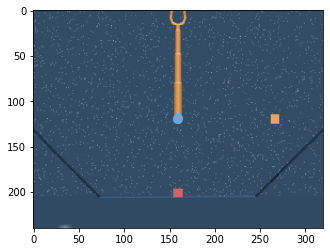

In [128]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from dm_control import suite
env = suite.load('stacker','stack_1')

box_size = 0.022
delta = 2.1
bound = .38


def rand_a(spec):
    return np.random.uniform(spec.minimum ,spec.maximum , spec.shape)

def stationary_reset(env,n_steps=200):
    env.reset()
    spec = env.action_spec()
    for _ in range(n_steps):
        action = rand_a(spec)
        env.step(action)
        
        
def get_target(env):
    return get_xpos(env,name='target')

def get_xpos(env,name=None):
    with env.physics.reset_context():
        env.physics.named.data.geom_xpos[name]
    
def set_xpos(env,name='box0',x=None,y=None,z=None):
    if x is not None:
        env.physics.named.data.geom_xpos[name][0] = x
    if y is not None:
        env.physics.named.data.geom_xpos[name][1] = y
    if z is not None:
        env.physics.named.data.geom_xpos[name][2] = z
        
def set_obj_beside_target(env,name='box0',side='left'):
    
    # get target x y z coords
    target_pos = get_target(env)
    target_x, target_z = target_pos[0],target_pos[2]
    # make sure the bounds work
    # if not, set object side to be within bound
    
    if target_x > bound - delta*box_size:
        side='left'
    if target_x < -bound+delta*box_size:
        side='right'
    
    if side =='left':
        x = target_x - delta*box_size 
    elif side == 'right':
        x = target_x + delta*box_size
    else:
        raise ValueError('set side = left or right')
        
    set_xpos(env,name=name,x=x)    
    
def set_stacker_qpos(env,**kwargs):
    id2name_list = ['arm_root','arm_shoulder','arm_elbow','arm_wrist','thumb',
                'thumbtip','finger','fingertip','box0_x','box0_y','box0_z']
    id2val = {str(id2name_list.index(k)):v for k,v in kwargs.items()}
    
    set_qpos(env,**id2val)
    
def set_box_in_gripper(env):
    hand_pos = get_xpos(env,name='hand')
    finger_pos  = get_xpos(env,name='fingertip1')
    thumb_pos  = get_xpos(env,name='thumbtip1')
    com_x = (finger_pos[0]+thumb_pos[0])/2.0
    com_z = (finger_pos[2]+thumb_pos[2])/2.0
    
    set_xpos(env,name='box0',x=com_x,z=com_z)
 

            
def set_qpos(env,**kwargs):
    qpos = env.physics.data.qpos.copy()
    model = env.physics.model
    nq = model.nq
    with env.physics.reset_context():
        for i in range(nq):
            if i in kwargs:
                print(i,'is here')
            env.physics.data.qpos[i] = kwargs[str(i)] if str(i) in kwargs else qpos[i]
            

def fix_gripper(env):
    set_stacker_qpos(env,finger=.1,thumb=.1)


#set_xpos(env,x=.38)
#set_obj_beside_target(env,name='box0',side='right')
#set_griqpospper(env,finger=0)
fix_gripper(env)
render_kwargs={}
render_kwargs['camera_id']=0
x = env.physics.render(**render_kwargs)
plt.imshow(x)

FieldIndexer(qpos):
 0     arm_root [ 0       ]
 1 arm_shoulder [-1       ]
 2    arm_elbow [-1       ]
 3    arm_wrist [-1       ]
 4        thumb [ 0.0843  ]
 5     thumbtip [ 0.0114  ]
 6       finger [ 0.0998  ]
 7    fingertip [-0.0659  ]
 8       box0_x [ 0.283   ]
 9       box0_z [ 0.022   ]
10       box0_y [ 1.57    ]


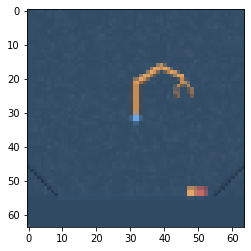

In [140]:
stationary_reset(env)
set_stacker_qpos(env,arm_root=0,arm_shoulder=-1,arm_elbow=-1,arm_wrist=-1)
#set_xpos(env,name='box0',x=.3)
#set_stacker_qpos(env,arm_root=5)

#action = np.array([0.,0.,0.,0.,0.])
#for _ in range(100):
#    env.step(action)

print(env.physics.named.data.qpos)
x = env.physics.render(64,64,camera_id=0)
plt.imshow(x)

In [9]:
env.physics.named.data.qpos

FieldIndexer(qpos):
 0     arm_root [ 2       ]
 1 arm_shoulder [ 1       ]
 2    arm_elbow [ 1       ]
 3    arm_wrist [ 0       ]
 4        thumb [ 0.288   ]
 5     thumbtip [-0.0124  ]
 6       finger [ 0.277   ]
 7    fingertip [-0.0103  ]
 8       box0_x [ 0.101   ]
 9       box0_z [ 0.022   ]
10       box0_y [-1.57    ]

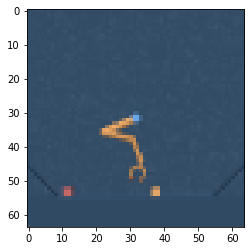

In [10]:
#set_stacker_qpos(env,thumb=.6,finger=.7)

#set_stacker_qpos(env,box0_z=15.)

#set_box_in_gripper(env)
set_stacker_qpos(env,arm_root=2.,arm_shoulder=2.5,arm_elbow=-1.,arm_wrist=-.6)

d={}
d['camera_id']=0
d['width']=64
d['height']=64
x = env.physics.render(**d)
plt.imshow(x)

In [11]:
with env.physics.reset_context():
    for i in range(11):
        env.physics.named.data.qpos[i]=.1

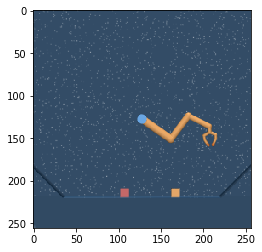

In [4]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from vqvae.envs.pusher import EasyPusher,GoalPusher

env = GoalPusher()

obs = env.reset()

img = env.dm_env.physics.render(256,256,0)

plt.imshow(img)

In [2]:
obs

{'observation': array([ 7.73387011e-01,  6.33934169e-01,  9.77778036e-01, -2.09642821e-01,
         9.81106820e-01,  1.93466812e-01,  9.80570541e-01,  1.96166803e-01,
        -1.64840518e-01,  9.86320234e-01, -6.06636007e-03,  9.99981599e-01,
        -1.28019284e-01,  9.91771679e-01, -7.93040708e-02,  9.96850472e-01,
         4.02588276e+00, -3.17370522e+00, -1.20941050e-01,  1.98360045e+00,
         5.97320205e-02,  4.99883919e-03,  4.92081800e-01,  8.05553197e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.13816372e-01,  3.06213980e-01, -9.07383134e-01,
        -4.20304471e-01,  2.11632426e-01,  2.19810195e-02, -7.07106781e-01,
         7.07106781e-01,  5.63347528e-15,  2.56157621e-13,  5.85836083e-16,
        -7.23187348e-02,  2.20000000e-02]),
 'state_observation': array([ 7.73387011e-01,  6.33934169e-01,  9.77778036e-01, -2.09642821e-01,
         9.81106820e-01,  1.93466812e-01,  9.80570541e-01,  1.96166803e-01,
        

In [3]:
obs_next,r,d,info = env.step(env.action_space.sample())
print(r,d,info)

-1.0 False {'is_success': False}


In [17]:
env.dm_env.physics.named.data.geom_xpos

FieldIndexer(geom_xpos):
                x         y         z         
 0      floor [ 0         0         0       ]
 1      wall1 [-0.683     0         0.283   ]
 2      wall2 [ 0.683     0         0.283   ]
 3 background [ 0         0.2       0.5     ]
 4   arm_root [ 0         0         0.4     ]
 5  upper_arm [ 0.0539    0         0.472   ]
 6 middle_arm [ 0.0646    0         0.606   ]
 7  lower_arm [-0.00853   0         0.615   ]
 8       hand [-0.0282    0         0.552   ]
 9      palm1 [-0.0237    0         0.525   ]
10      palm2 [-0.00188   0         0.546   ]
11     thumb1 [-0.0241    0         0.5     ]
12     thumb2 [-0.0105    0         0.484   ]
13  thumbtip1 [ 0.00364   0         0.475   ]
14  thumbtip2 [ 0.00835   0         0.471   ]
15    finger1 [ 0.0236    1.33e-18  0.545   ]
16    finger2 [ 0.0382    3.85e-18  0.53    ]
17 fingertip1 [ 0.047     5.89e-18  0.516   ]
18 fingertip2 [ 0.0501    6.6e-18   0.51    ]
19       box0 [ 0.257     0         0.022   ]
20     t